## 画像に映る人がヘルメットをかぶっているか否かの分析

In [1]:
from ultralytics import YOLO
from IPython.display import Image
import shutil
import numpy as np
import os

In [2]:
# デバイスの確認
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


## 訓練データをtrain_data, valid_dataに分割する

In [3]:
# 訓練データセットのパスを指定
data_dir = "C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train"

In [4]:
# 画像ファイルのパスとラベルファイルのパスを取得
image_files = [os.path.join(data_dir, 'images', filename) for filename in os.listdir(os.path.join(data_dir, 'images')) if filename.endswith(".jpg")]
label_files = [os.path.join(data_dir, 'labels', filename) for filename in os.listdir(os.path.join(data_dir, 'labels')) if filename.endswith(".txt")]

In [5]:
image_files

['C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000001_jpg.rf.df25c3d751ae509dc90ba56fd301f1b0.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000002_jpg.rf.31f2cd35d1b9aaa764f7a0836591d3c3.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000003_jpg.rf.51b126505df000f6bbf6b965aac0f62e.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000004_jpg.rf.7cd7b3740fa78e99c877ce71a36949c3.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000005_jpg.rf.ec6c3148d49dc4a53436ba014c4e6938.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000006_jpg.rf.67f9e25e69985fca1ebe415b1f4dfdb5.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000007_jpg.rf.144157e581cf4c36a1287ba88eb12d54.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\images\\000008_jpg.rf.ee13f076cf1899a9129507d5e56718f8.jpg',


In [6]:
label_files

['C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000001_jpg.rf.df25c3d751ae509dc90ba56fd301f1b0.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000002_jpg.rf.31f2cd35d1b9aaa764f7a0836591d3c3.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000003_jpg.rf.51b126505df000f6bbf6b965aac0f62e.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000004_jpg.rf.7cd7b3740fa78e99c877ce71a36949c3.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000005_jpg.rf.ec6c3148d49dc4a53436ba014c4e6938.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000006_jpg.rf.67f9e25e69985fca1ebe415b1f4dfdb5.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000007_jpg.rf.144157e581cf4c36a1287ba88eb12d54.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train\\labels\\000008_jpg.rf.ee13f076cf1899a9129507d5e56718f8.txt',


In [7]:
# なぜか.joinのが"\\"でつながれていたので"/"に変更
train_image_paths = []
for img_path in image_files:
    new_img_path = img_path.replace("\\", "/")
    train_image_paths.append(new_img_path)

In [8]:
train_image_paths

['C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000001_jpg.rf.df25c3d751ae509dc90ba56fd301f1b0.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000002_jpg.rf.31f2cd35d1b9aaa764f7a0836591d3c3.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000003_jpg.rf.51b126505df000f6bbf6b965aac0f62e.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000004_jpg.rf.7cd7b3740fa78e99c877ce71a36949c3.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000005_jpg.rf.ec6c3148d49dc4a53436ba014c4e6938.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000006_jpg.rf.67f9e25e69985fca1ebe415b1f4dfdb5.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000007_jpg.rf.144157e581cf4c36a1287ba88eb12d54.jpg',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/images/000008_jpg.rf.ee13f076cf1899a9129507d5e56718f8.jpg',
 'C:/Users/yuuki

In [9]:
train_labels_paths = []
for label_path in label_files:
    new_label_path = label_path.replace("\\", "/")
    train_labels_paths.append(new_label_path)
train_labels_paths

['C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000001_jpg.rf.df25c3d751ae509dc90ba56fd301f1b0.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000002_jpg.rf.31f2cd35d1b9aaa764f7a0836591d3c3.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000003_jpg.rf.51b126505df000f6bbf6b965aac0f62e.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000004_jpg.rf.7cd7b3740fa78e99c877ce71a36949c3.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000005_jpg.rf.ec6c3148d49dc4a53436ba014c4e6938.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000006_jpg.rf.67f9e25e69985fca1ebe415b1f4dfdb5.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000007_jpg.rf.144157e581cf4c36a1287ba88eb12d54.txt',
 'C:/Users/yuuki/Kaggle/object_detection_try/helmet/data/train/labels/000008_jpg.rf.ee13f076cf1899a9129507d5e56718f8.txt',
 'C:/Users/yuuki

In [10]:
# 画像ファイルとラベルファイルをペアにする
train_data_pairs = list(zip(train_image_paths, train_labels_paths))

In [11]:
# モデルに偏りがないようにshuffleする
np.random.shuffle(train_data_pairs)

In [12]:
# 訓練データと検証データの分割率を指定
train_ratio = 0.8

# 訓練データと検証データの個数
train_num = int(len(train_data_pairs) * train_ratio)
val_num = len(train_data_pairs) - train_num

# 訓練データと検証データのリストを作成
train_data_pairs_list = train_data_pairs[:train_num]
val_data_pairs_list = train_data_pairs[train_num:]

In [13]:
# 訓練データのリストを保存
with open("train_image_paths.txt", "w") as f:
    for image_path, _ in train_data_pairs_list:
        f.write(image_path + "\n")

with open("train_label_paths.txt", "w") as f:
    for _, label_path in train_data_pairs_list:
        f.write(label_path + "\n")

# 検証データのリストを保存
with open("val_image_paths.txt", "w") as f:
    for image_path, _ in val_data_pairs_list:
        f.write(image_path + "\n")

with open("val_label_paths.txt", "w") as f:
    for _, label_path in val_data_pairs_list:
        f.write(label_path + "\n")

In [14]:
# 訓練データの画像パスリストを読み込み
with open("train_image_paths.txt", "r") as f:
    train_image_paths = [line.strip() for line in f]

# 訓練データのラベルパスリストを読み込み
with open("train_label_paths.txt", "r") as f:
    train_label_paths = [line.strip() for line in f]

# 検証データの画像パスリストを読み込み
with open("val_image_paths.txt", "r") as f:
    val_image_paths = [line.strip() for line in f]

# 検証データのラベルパスリストを読み込み
with open("val_label_paths.txt", "r") as f:
    val_label_paths = [line.strip() for line in f]

In [15]:
# 訓練データディレクトリを作成
os.makedirs("./data2/train/images", exist_ok=True)
os.makedirs("./data2/train/labels", exist_ok=True)

# 検証データディレクトリを作成
os.makedirs("./data2/valid/images", exist_ok=True)
os.makedirs("./data2/valid/labels", exist_ok=True)

In [16]:
# 訓練データの配置
for image_path, label_path in zip(train_image_paths, train_label_paths):
    # 画像ファイルの移動
    shutil.move(image_path, os.path.join("./data2/train/images", os.path.basename(image_path)))

    # ラベルファイルの移動
    shutil.move(label_path, os.path.join("./data2/train/labels", os.path.basename(label_path)))

# 検証データの配置
for image_path, label_path in zip(val_image_paths, val_label_paths):
    # 画像ファイルの移動
    shutil.move(image_path, os.path.join("./data2/valid/images", os.path.basename(image_path)))

    # ラベルファイルの移動
    shutil.move(label_path, os.path.join("./data2/valid/labels", os.path.basename(label_path)))

## テストデータをdataからdata2に移動

In [18]:
# os.makedirs("./data2", exist_ok=True)
source_path = "data/test"
destination_path = "data2"

shutil.move(source_path, destination_path)

'data2/test\\test'

In [19]:
# yamlファイルもreadmeファイルも移動する
# 移動元のファイルパス
source_path = "data/data.yaml"

# 移動先のファイルパス
destination_path = "data2/data.yaml"

# ファイルを移動
os.rename(source_path, destination_path)

In [20]:
# 移動元のファイルパス
source_path = "data/README.dataset.txt"

# 移動先のファイルパス
destination_path = "data2/README.dataset.txt"

# ファイルを移動
os.rename(source_path, destination_path)

In [21]:
# 移動元のファイルパス
source_path = "data/README.roboflow.txt"

# 移動先のファイルパス
destination_path = "data2/README.roboflow.txt"

# ファイルを移動
os.rename(source_path, destination_path)

In [22]:
# 学習
!yolo task=detect mode=train model=yolov8x.pt data=C:/Users/yuuki/Kaggle/object_detection_try/helmet/data2/data.yaml epochs=10 imgsz=416


  0%|          | 0.00/131M [00:00<?, ?B/s]
  0%|          | 504k/131M [00:00<00:26, 5.08MB/s]
  1%|          | 1.43M/131M [00:00<00:17, 7.79MB/s]
  2%|▏         | 2.45M/131M [00:00<00:14, 9.05MB/s]
  3%|▎         | 3.49M/131M [00:00<00:13, 9.78MB/s]
  3%|▎         | 4.52M/131M [00:00<00:13, 10.0MB/s]
  4%|▍         | 5.57M/131M [00:00<00:12, 10.3MB/s]
  5%|▌         | 6.60M/131M [00:00<00:12, 10.5MB/s]
  6%|▌         | 7.61M/131M [00:00<00:12, 10.4MB/s]
  7%|▋         | 8.65M/131M [00:00<00:12, 10.5MB/s]
  7%|▋         | 9.66M/131M [00:01<00:12, 10.5MB/s]
  8%|▊         | 10.7M/131M [00:01<00:11, 10.7MB/s]
  9%|▉         | 11.8M/131M [00:01<00:11, 10.8MB/s]
 10%|▉         | 12.8M/131M [00:01<00:11, 10.8MB/s]
 11%|█         | 13.9M/131M [00:01<00:11, 10.8MB/s]
 11%|█▏        | 14.9M/131M [00:01<00:11, 10.9MB/s]
 12%|█▏        | 16.0M/131M [00:01<00:11, 10.7MB/s]
 13%|█▎        | 17.0M/131M [00:01<00:11, 10.4MB/s]
 14%|█▍        | 18.0M/131M [00:01<00:11, 10.1MB/s]
 15%|█▍        | 19.0


Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=C:/Users/yuuki/Kaggle/object_detection_try/helmet/data2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

## 結果の表示
* 混同行列

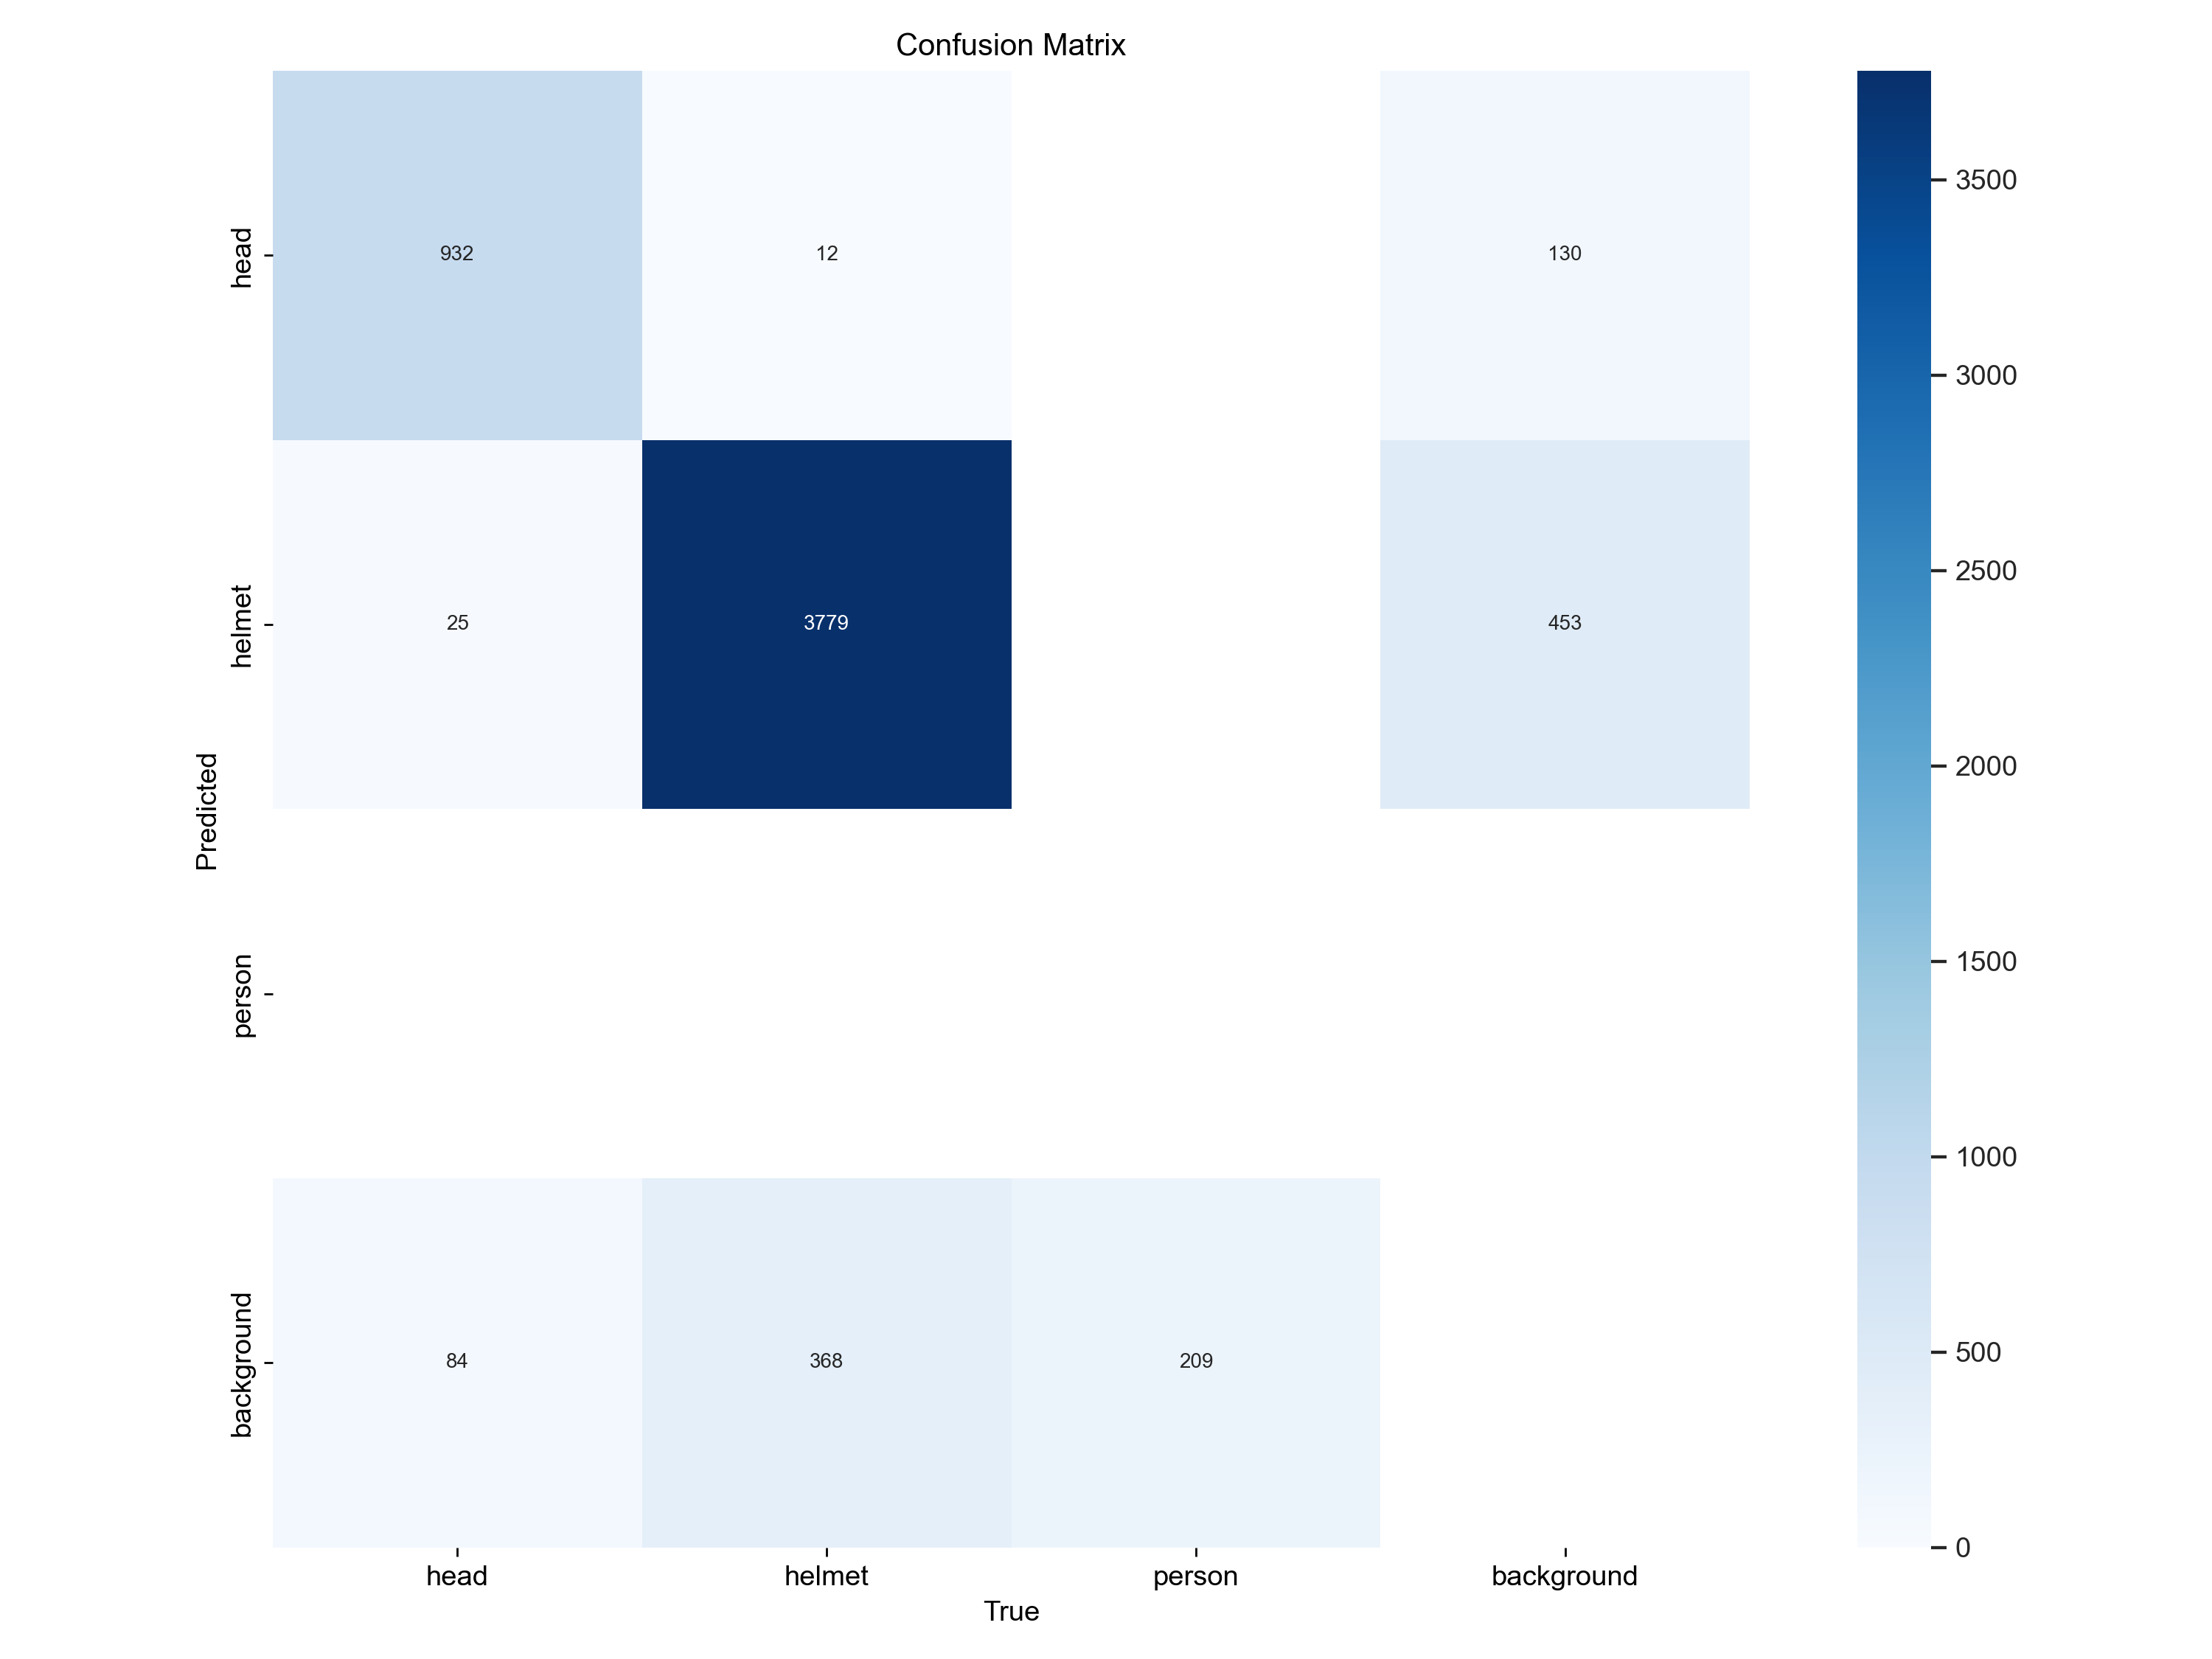

In [23]:
Image("runs/detect/train3/confusion_matrix.png")

In [26]:
# 再現率の計算
recall = 932/(932+12+0+130)
print(recall)

0.8677839851024208


In [28]:
# 適合率の計算
precision = 932/(932+25+0+84)
print(precision)

0.8952929875120077


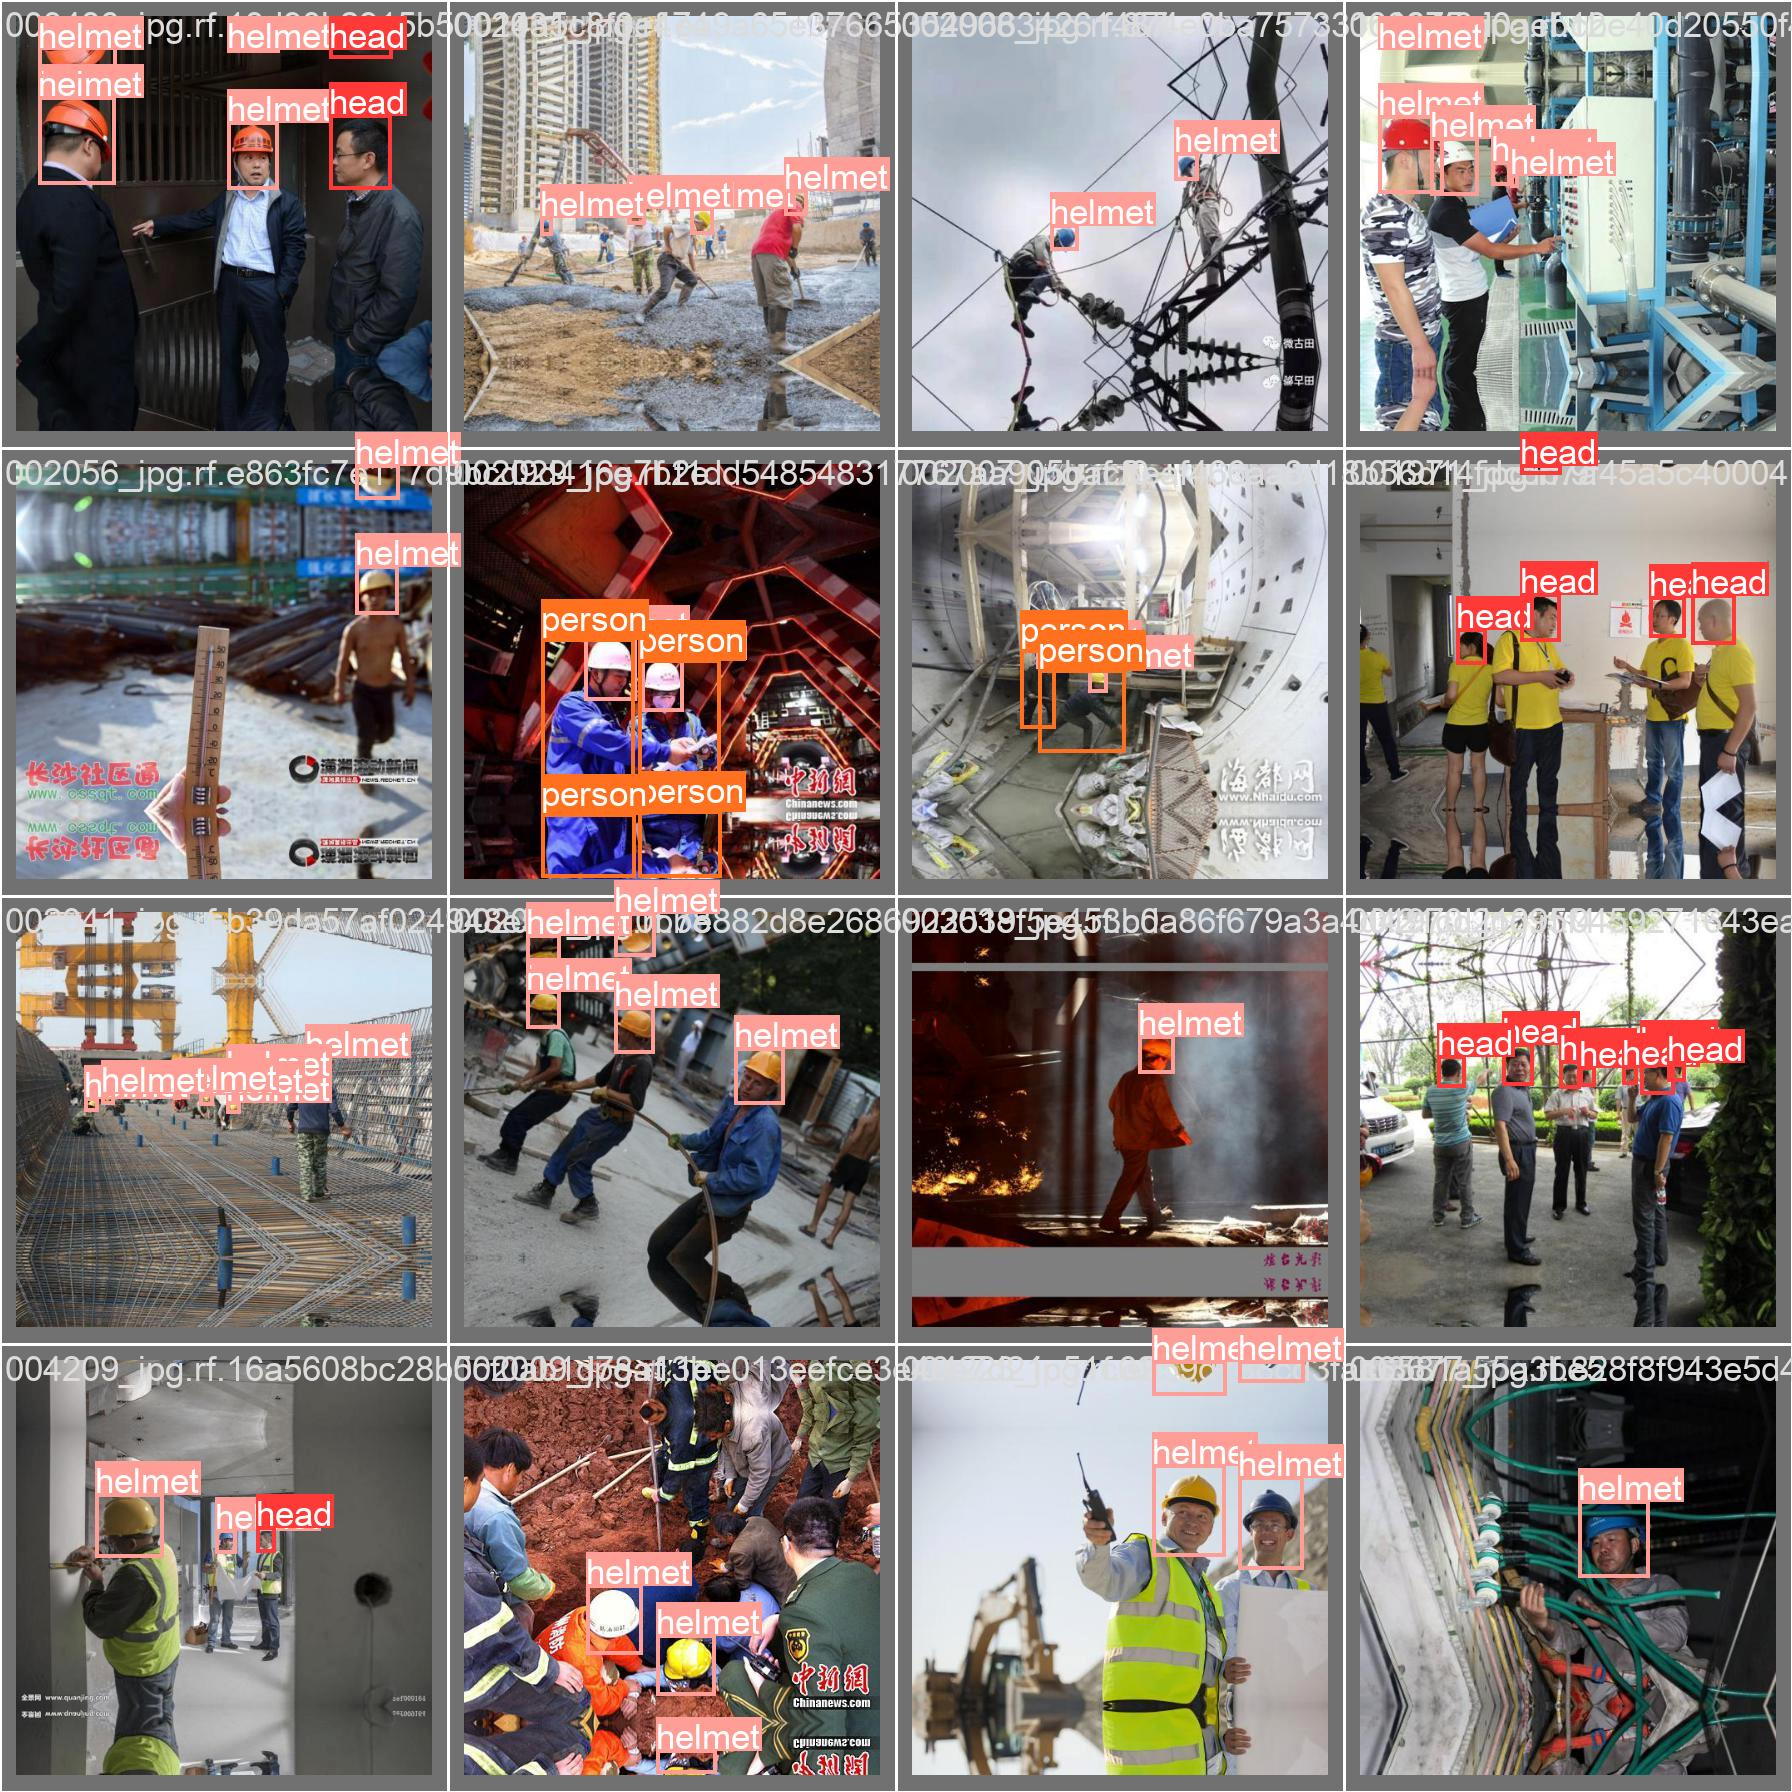

In [29]:
# 正解データと予測の比較
# 正解データ
Image("runs/detect/train3/val_batch0_labels.jpg")

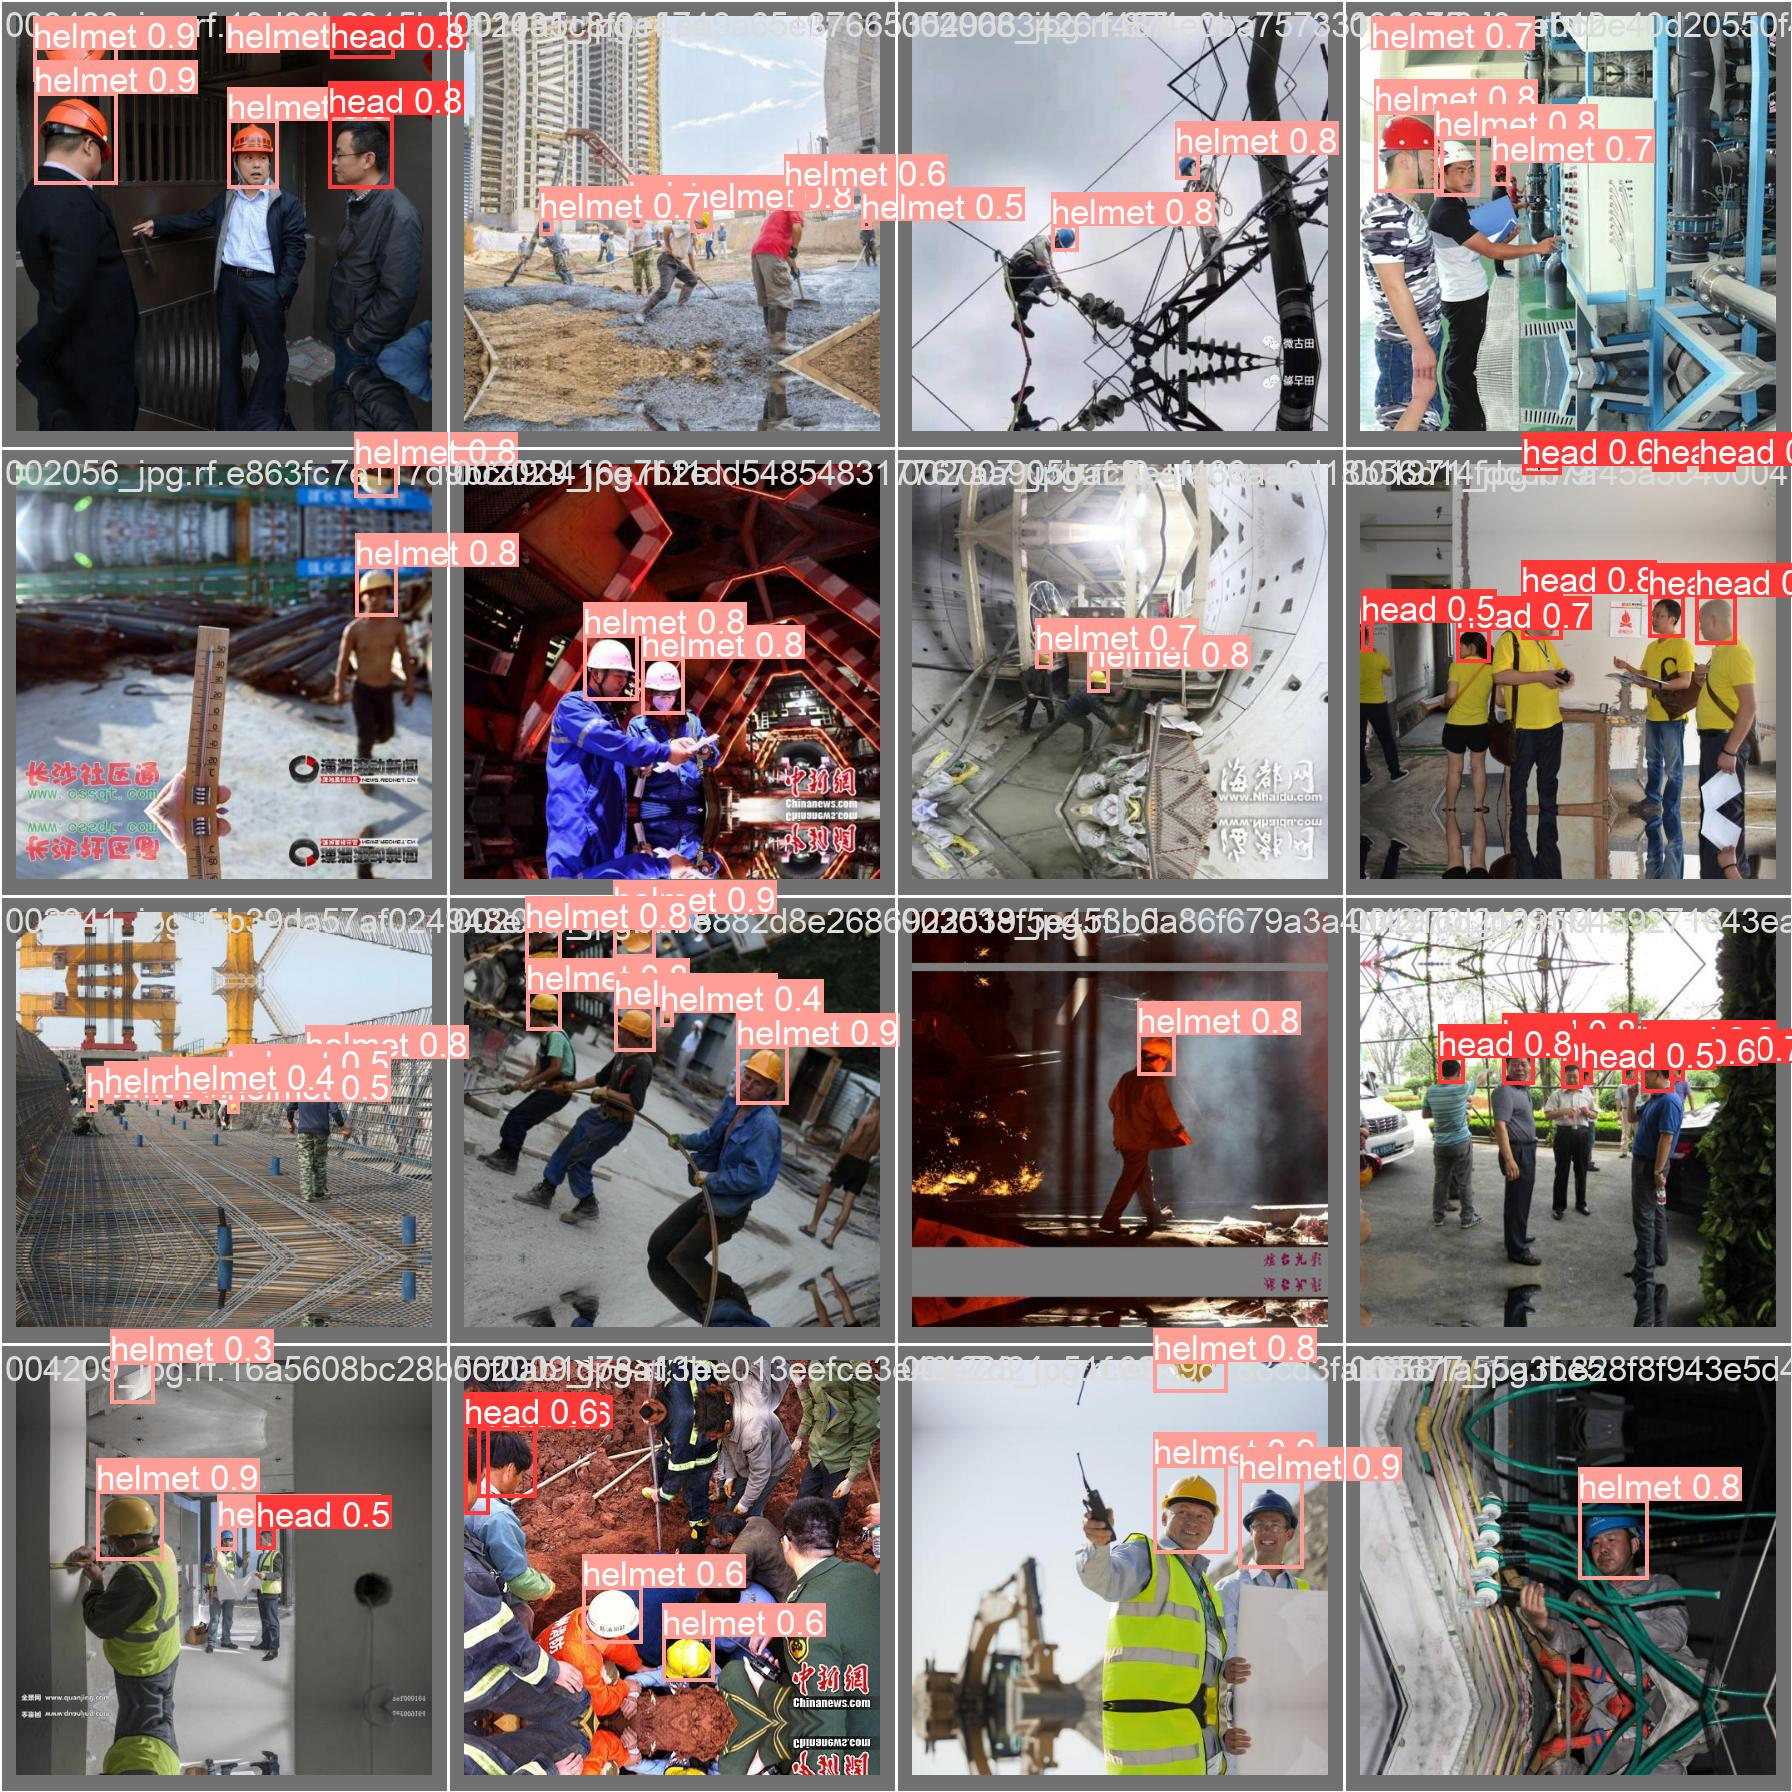

In [30]:
# 予測
Image("runs/detect/train3/val_batch0_pred.jpg")

## 検証

In [31]:
# 検証データで検証
# ベストなparamsを使って
!yolo detect val model=C:/Users/yuuki/Kaggle/object_detection_try/helmet/runs/detect/train3/weights/best.pt data=C:/Users/yuuki/Kaggle/object_detection_try/helmet/data2/data.yaml split=val

Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
                   all       1054       5409      0.951      0.583       0.63      0.411
                  head       1054       1041      0.918      0.868      0.931      0.607
                helmet       1054       4159      0.936      0.881      0.944       0.62
                person       1054        209          1          0     0.0158    0.00565
Speed: 0.1ms preprocess, 17.4ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\val
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\valid\labels.cache... 1054 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\valid\labels.cache... 1054 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/66 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   2%|▏         | 1/66 [00:02<02:26,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   3%|▎         | 2/66 [00:02<01:12,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   5%|▍         | 3/66 [00:02<00:48,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▌         | 4

## テストデータで推論

In [33]:
!yolo detect val model=C:/Users/yuuki/Kaggle/object_detection_try/helmet/runs/detect/train3/weights/best.pt data=C:/Users/yuuki/Kaggle/object_detection_try/helmet/data2/data.yaml split=test

Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs
val: New cache created: C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels.cache
                   all       1766       8915      0.958      0.592      0.637      0.418
                  head       1766       2208      0.931       0.88      0.938      0.611
                helmet       1766       6482      0.945      0.896      0.956      0.635
                person       1766        225          1          0     0.0181    0.00791
Speed: 0.1ms preprocess, 16.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\val2
💡 Learn more at https://docs.ultralytics.com/modes/val



val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels...:   0%|          | 0/1766 [00:00<?, ?it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels... 201 images, 0 backgrounds, 0 corrupt:  11%|█▏        | 201/1766 [00:00<00:00, 1970.59it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels... 415 images, 0 backgrounds, 0 corrupt:  23%|██▎       | 415/1766 [00:00<00:00, 2061.45it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels... 626 images, 0 backgrounds, 0 corrupt:  35%|███▌      | 626/1766 [00:00<00:00, 2083.47it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels... 843 images, 0 backgrounds, 0 corrupt:  48%|████▊     | 843/1766 [00:00<00:00, 2109.21it/s]
val: Scanning C:\Users\yuuki\Kaggle\object_detection_try\helmet\data2\test\labels... 1066 images, 0 backgrounds, 0 corrupt:  60%|██████    | 1066/1766 [00:00<00:00, 215

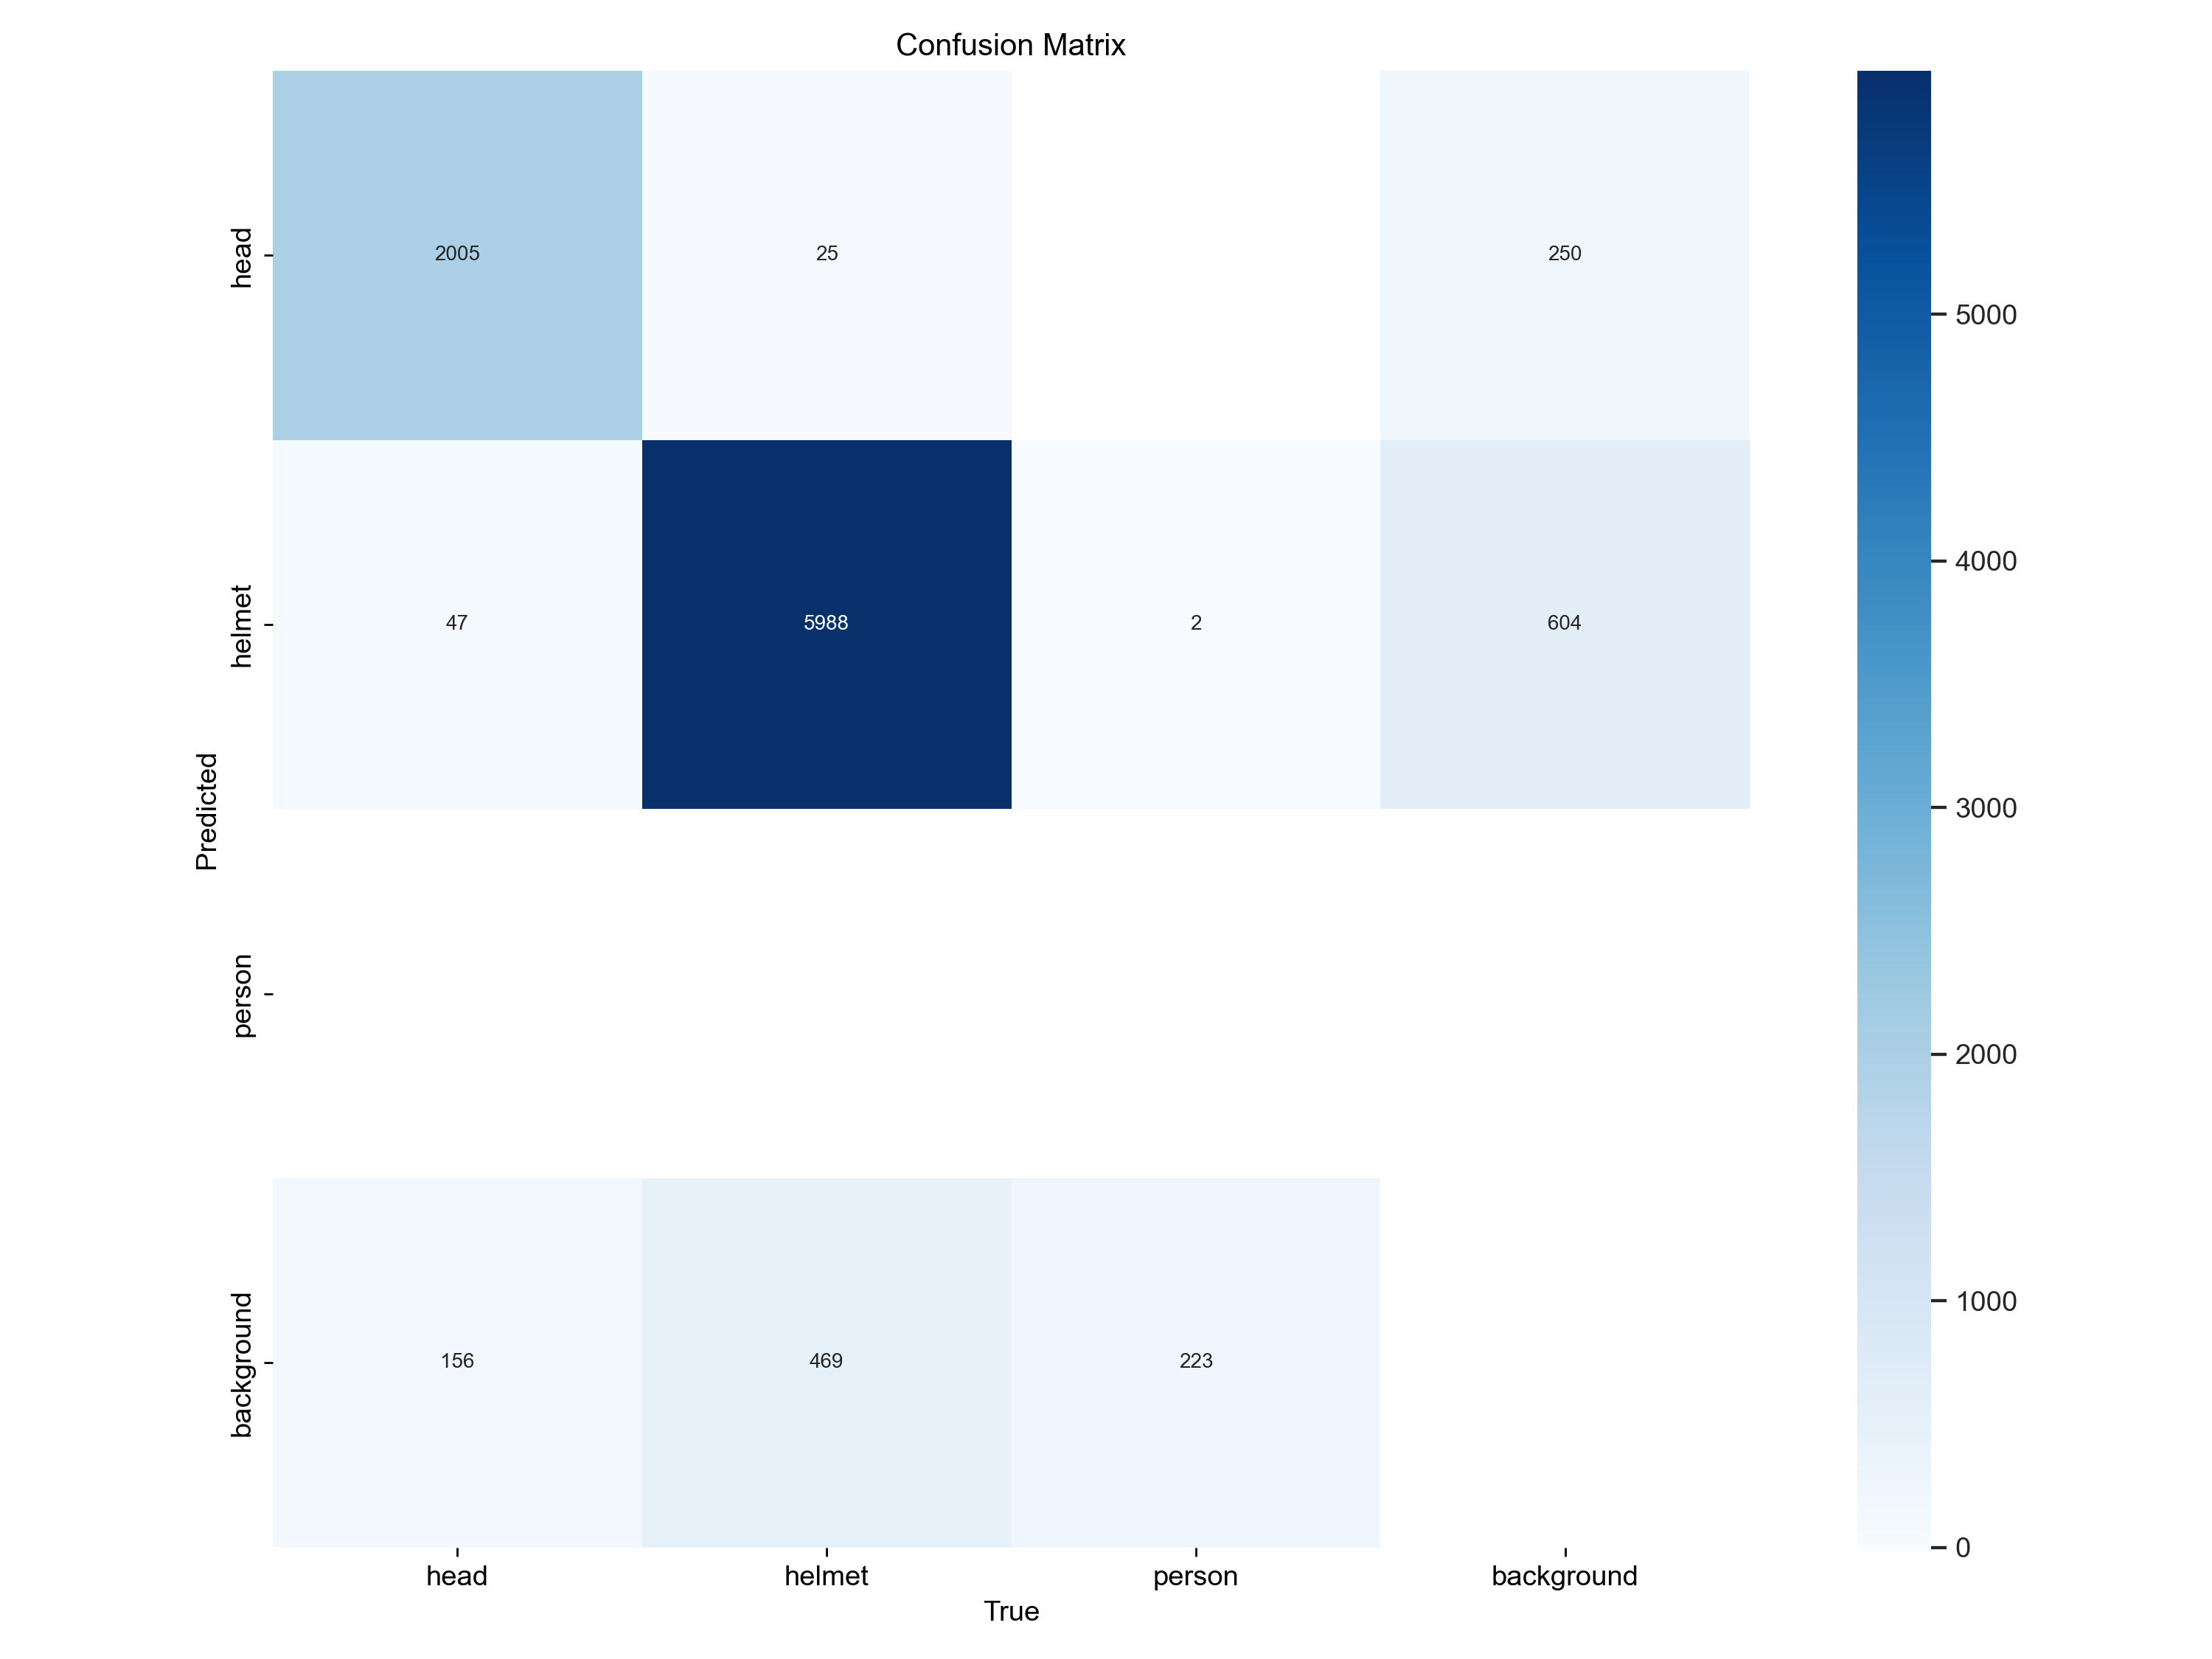

In [35]:
# テストデータの混同行列
Image("C:/Users/yuuki/Kaggle/object_detection_try/helmet/runs/detect/val2/confusion_matrix.png")

In [37]:
# テストデータのrecall, precision
# recall
recall_t = np.round(2005 /(2005+25+0+250), 3)
print(recall_t)

0.879


In [38]:
# precision
precision_t = np.round(2005/(2005+47+0+156), 3)
print(precision_t)

0.908


## 正解と予測の表示
* 正解

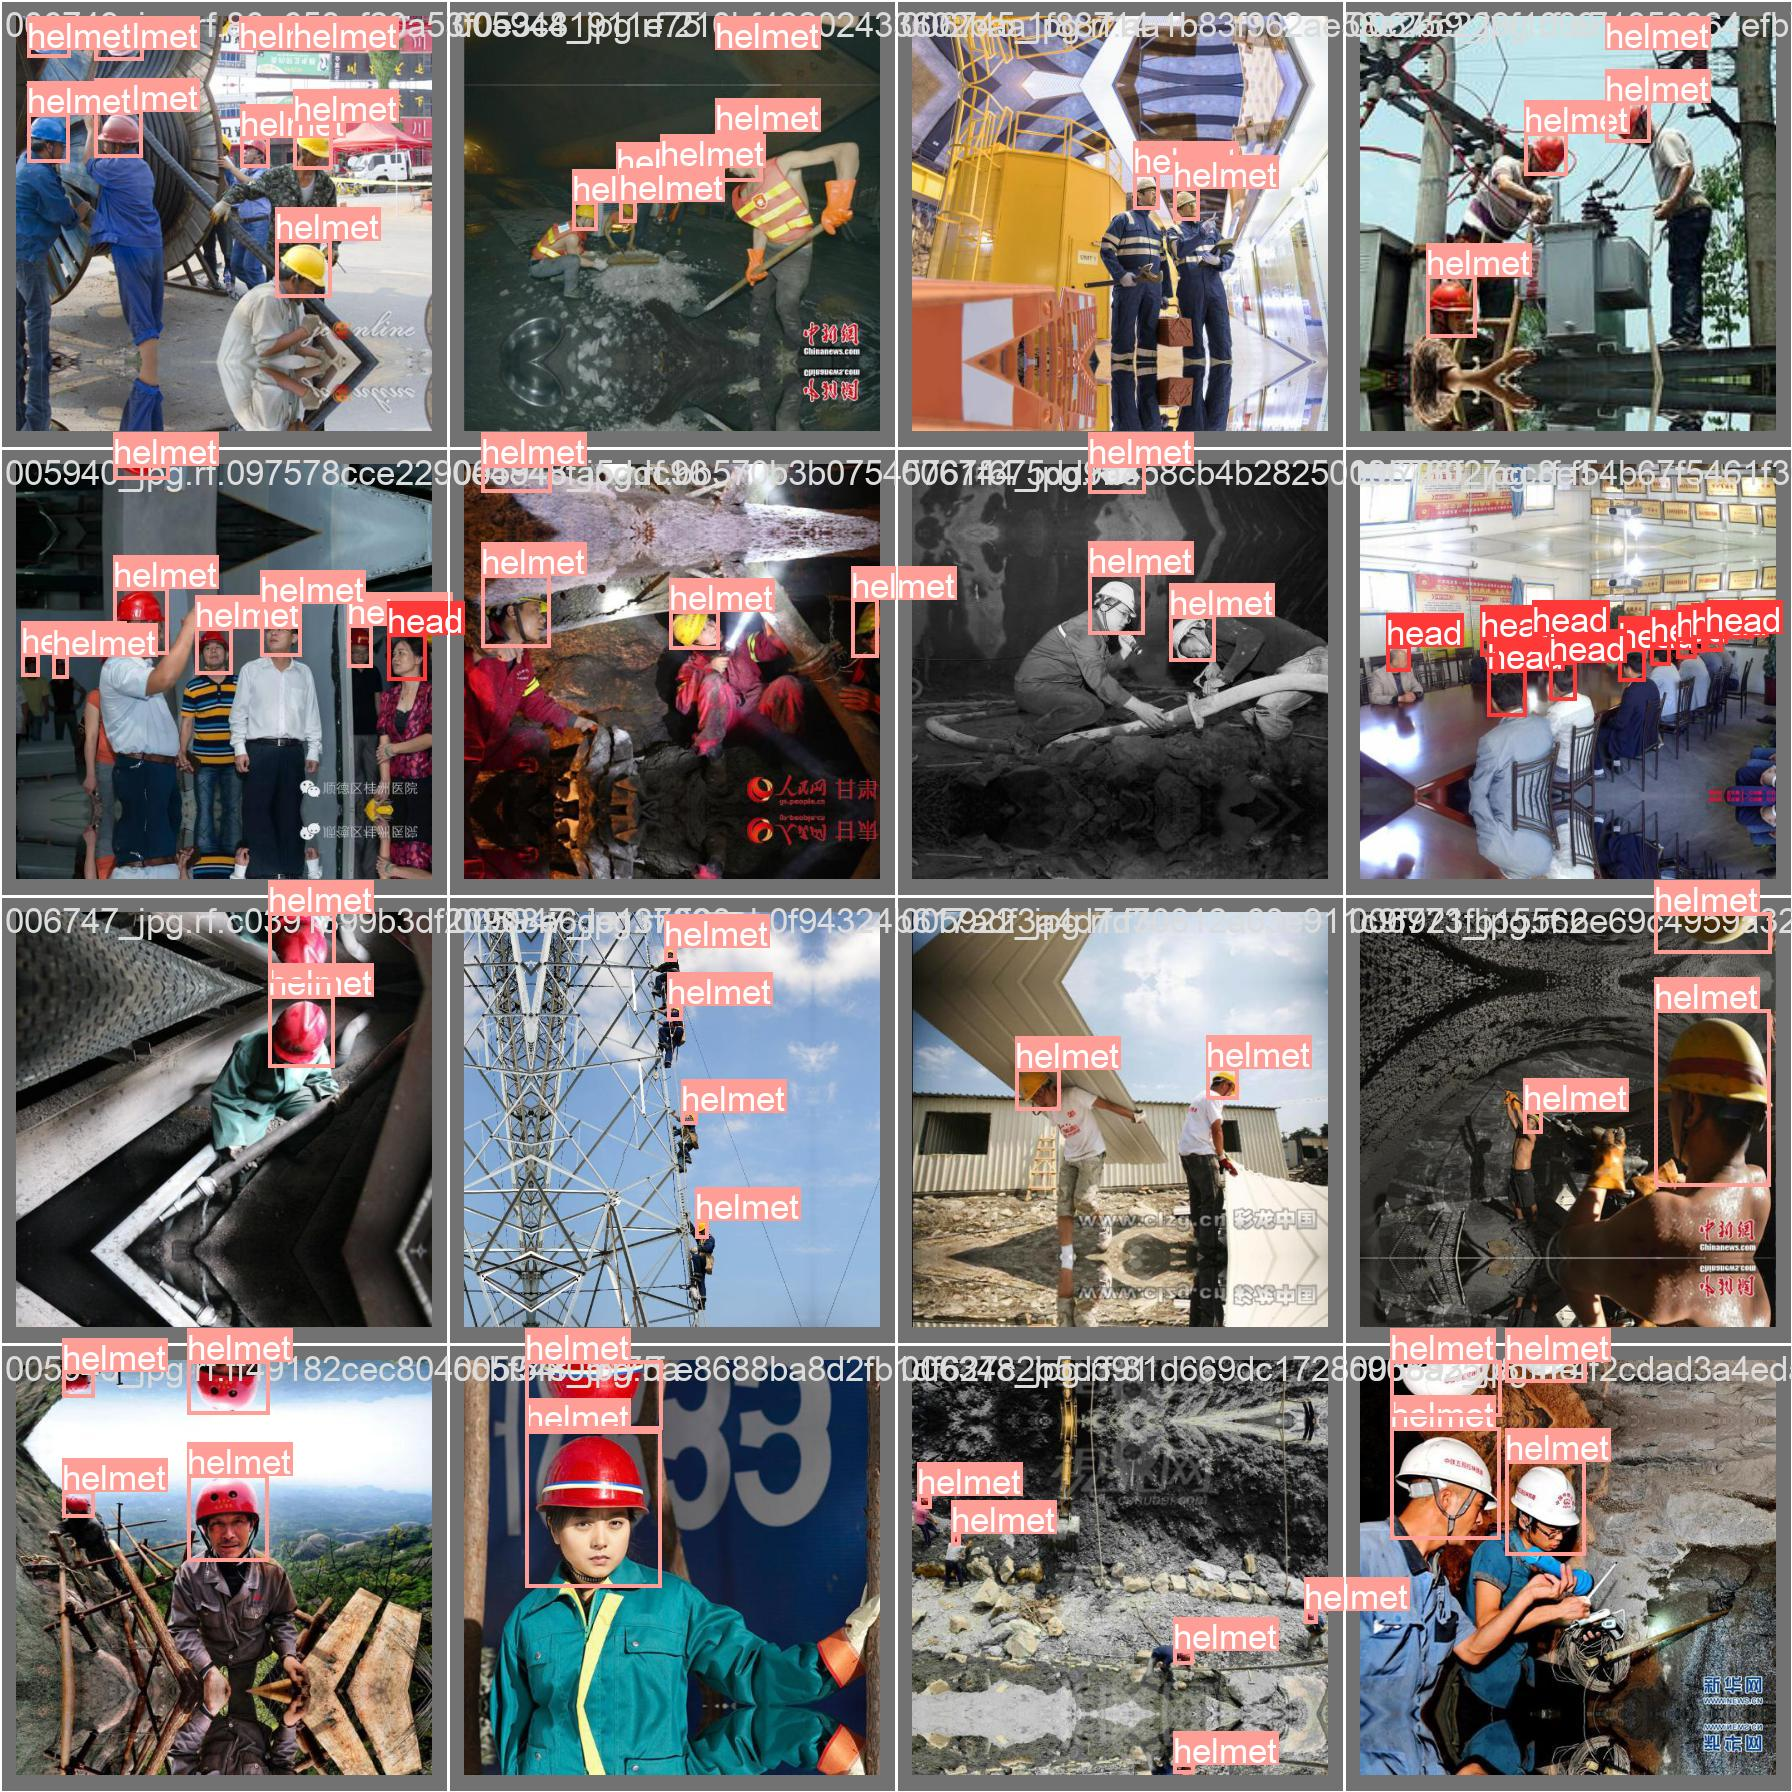

In [39]:
Image("runs/detect/val2/val_batch1_labels.jpg")

* 予測

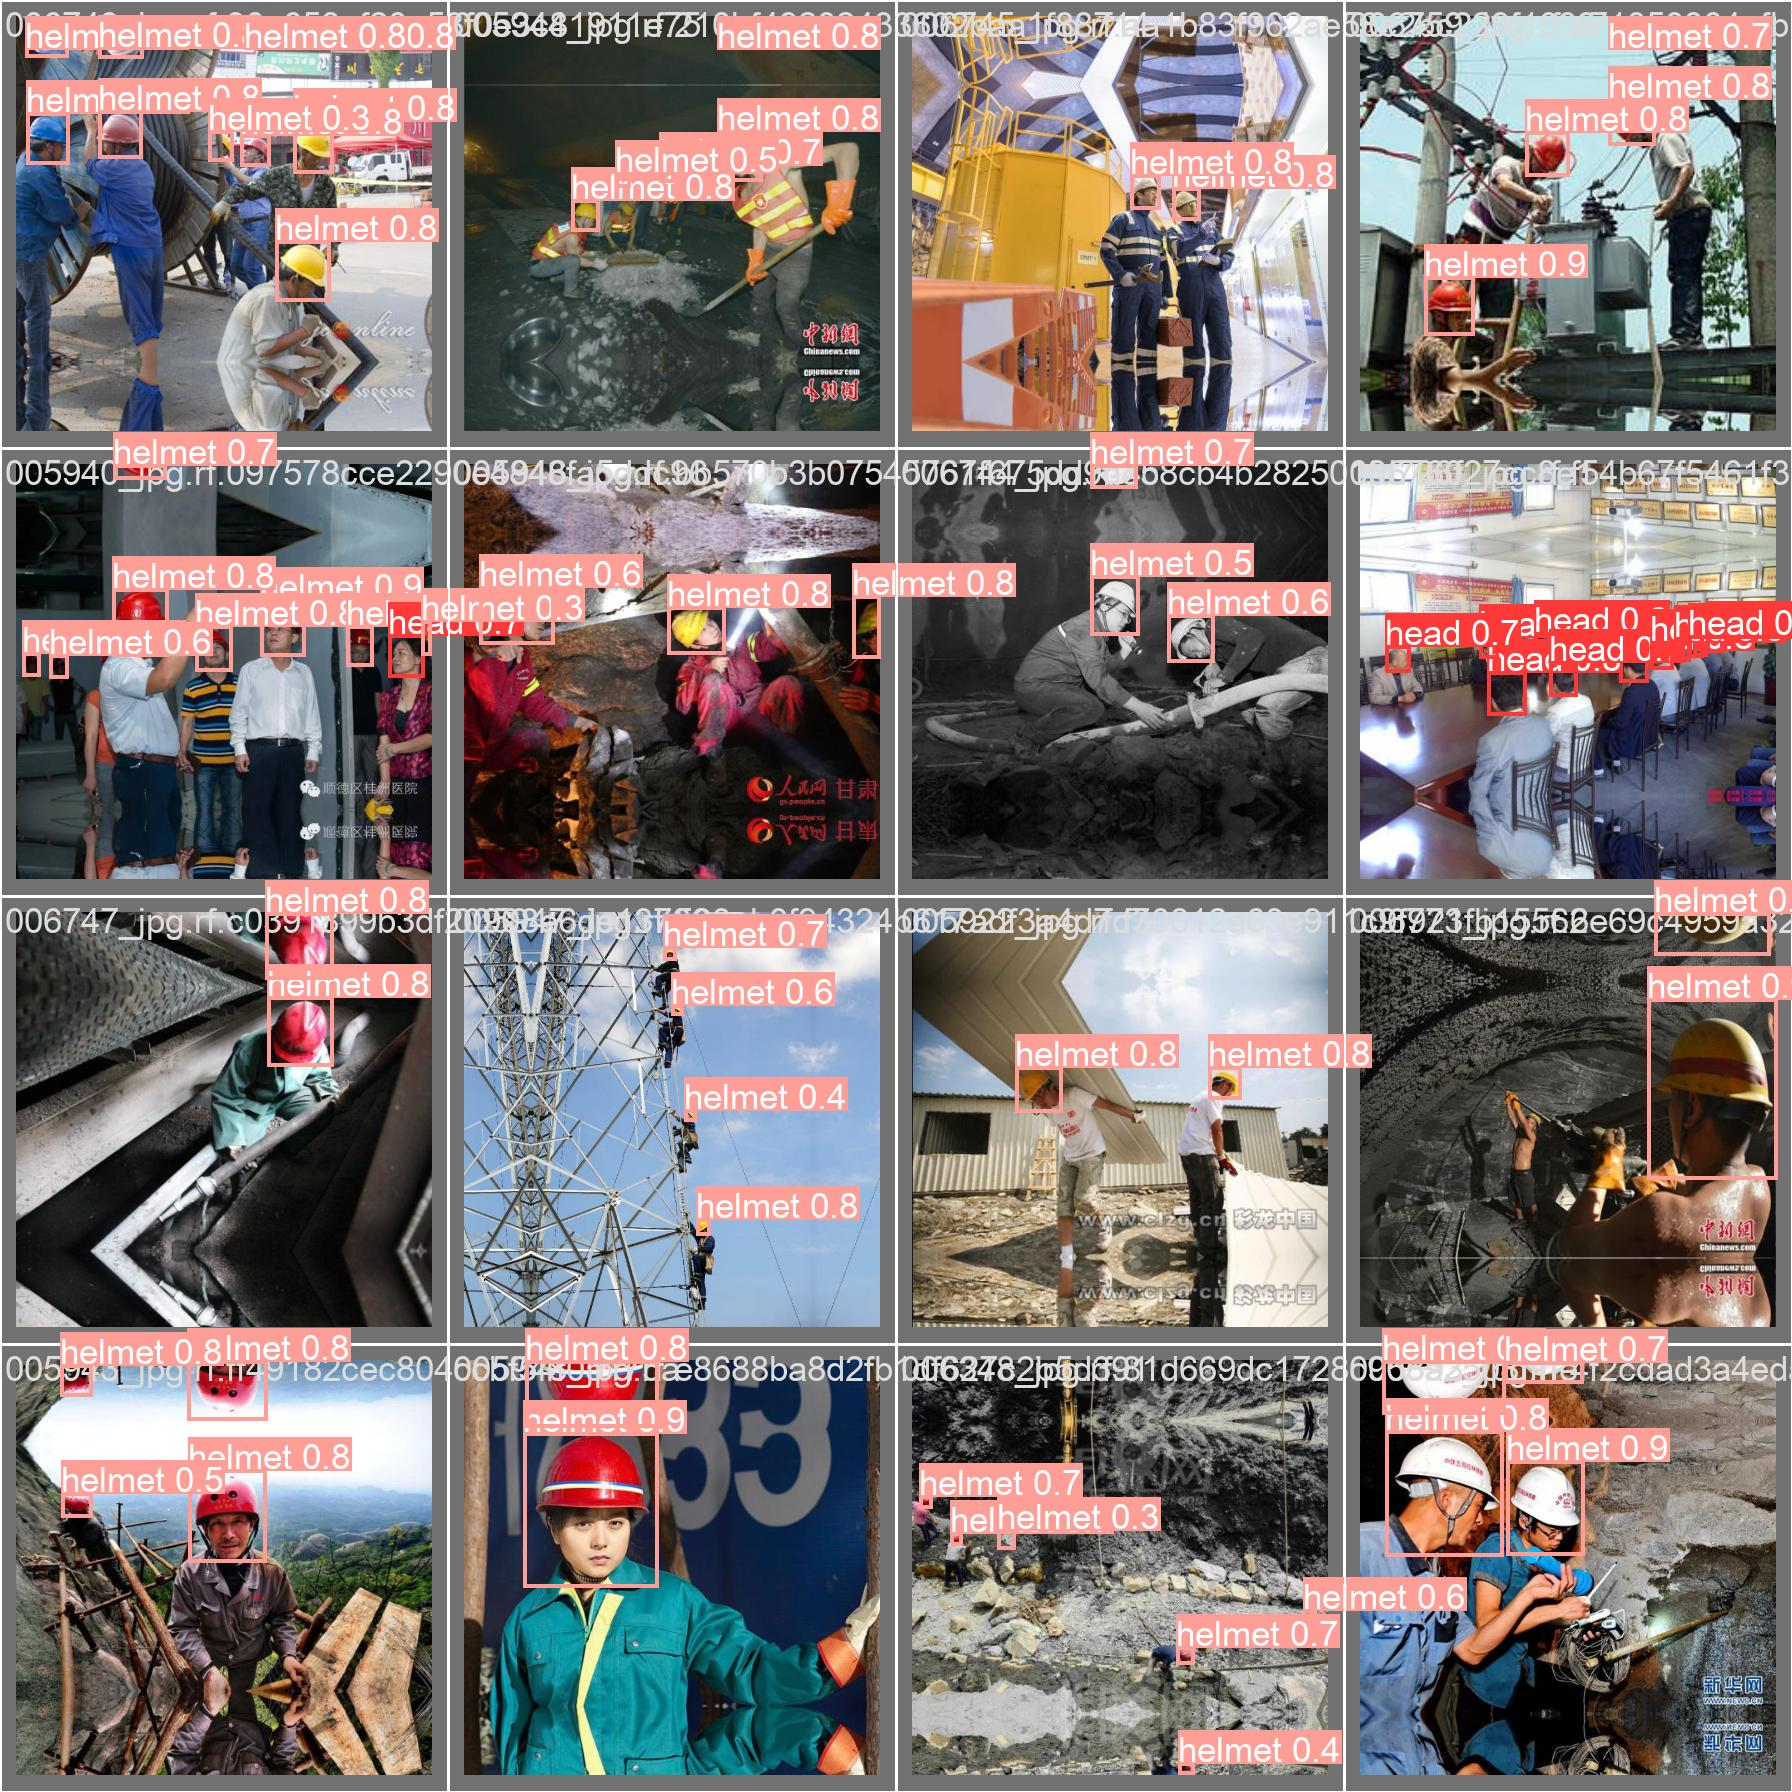

In [41]:
Image("runs/detect/val2/val_batch1_pred.jpg")

## ベストモデルの保存

In [42]:
!yolo export model=C:/Users/yuuki/Kaggle/object_detection_try/helmet/runs/detect/train3/weights/best.pt format=onnx

Ultralytics YOLOv8.2.2 🚀 Python-3.10.14 torch-2.2.2+cu118 CPU (13th Gen Intel Core(TM) i7-13700HX)
Model summary (fused): 268 layers, 68126457 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from 'C:\Users\yuuki\Kaggle\object_detection_try\helmet\runs\detect\train3\weights\best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 7, 3549) (130.4 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 2.8s, saved as 'C:\Users\yuuki\Kaggle\object_detection_try\helmet\runs\detect\train3\weights\best.onnx' (260.0 MB)

Export complete (6.6s)
Results saved to C:\Users\yuuki\Kaggle\object_detection_try\helmet\runs\detect\train3\weights
Predict:         yolo predict task=detect model=C:\Users\yuuki\Kaggle\object_detection_try\helmet\runs\detect\train3\weights\best.onnx imgsz=416  
Validate:        yolo val task=detect model=C:\Users\yuuki\Kaggle\object_detection_try\helmet\runs\detect\train3\weights\best.onnx imgsz=416 data=C:/Users/yuuki/Kaggle/ob